<a href="https://colab.research.google.com/github/JounKK/MLstudy/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

## STEP 1. 데이터 만들기

In [2]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])
class2_data=torch.hstack([random5,random0])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

# case 2 : 난이도가 있는 문제
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

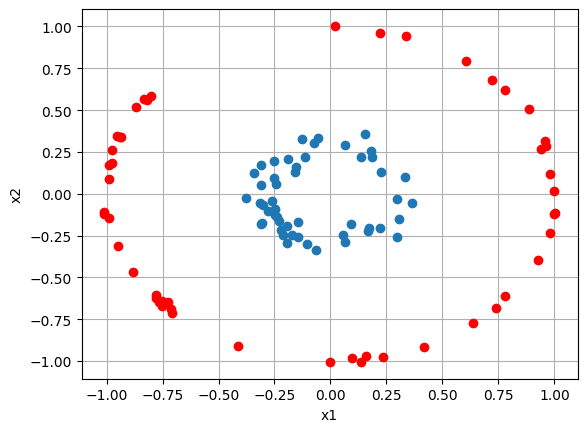

In [3]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP 2. 모델 만들기

In [57]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain, 히든레이어 1개
        self.linear = nn.Sequential(nn.Linear(2, 1000),
                                    nn.Sigmoid(),
                                    nn.Linear(1000, 1),
                                    nn.Sigmoid())

        # case 1, very simple
        self.linear = nn.Sequential(nn.Linear(2,1),
                                    nn.Sigmoid())

        # case 1, deep
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())

        # case 2, plain, 히든레이어 1개
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        # 1000개로 하면 발산..
        # 모델이 커질수록 LR은 좀 줄여서 차분하게 업뎃하는 게 낫더라.
        # 복잡할수록(파라미터 많으면) 학습 자체는 어려워짐. LR이나 다른 것도 잘 바꿔줘야한다.
        # weight 개수가 많다는 것은 입력 -> 출력 사이에 수많은 w가 있다는 것이고, 학습을 하면 엄청 변화가 있으니 안정성 필요해


        # case 2, very simple
        self.linear = nn.Sequential(nn.Linear(2,1),
                                    nn.Sigmoid())
        # 선형분류 밖에 안됌 !!
        # 구불구불 경계선이 안생긴다.
        # 경계선은 어디서 나온다 ? 나오는 값이 1/2일 때 경계선이 그려짐 !
        # sigmoid 가 1/2로 출력이면, 들값은 0이어야 함. >> 직선의 방정식이 나옴. ax + by + c = 0 이니까
        # 그래서 이렇게 모델이 생기면 경계 분류선이 선형밖에 안생김 !! 모델에 손을 대야함 !!
        # 복잡한 함수가 되면, 시그모이드를 한 번 이상 통과하니까 직선이 아닌 구불해질 수 있음.


        # case 2, deep
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())

        # case 2, very deep
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]]),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        # vanishing gradient 일어남 : 렐루로 해결해볼까 . . ?

        # case 2, very deep, relu
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.ReLU(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]]),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        return x

In [32]:
# 깊은 신경망 만들기 !
# nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(5)])
# nn.Sequential(*[nn.Linear(100,100) if i % 2 == 0 else nn.Sigmoid() for i in range(10)])
# nn.Sequential(*[i for _ in range(5) for i in [nn.Linear(100,100), nn.Sigmoid()]])

Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Sigmoid()
)

In [58]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1, x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Sequential(
      (0): Linear(in_features=100, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=100, bias=True)
      (5): ReLU()
      (6): Linear(in_features=100, out_features=100, bias=True)
      (7): ReLU()
      (8): Linear(in_features=100, out_features=100, bias=True)
      (9): ReLU()
      (10): Linear(in_features=100, out_features=100, bias=True)
      (11): ReLU()
      (12): Linear(in_features=100, out_features=100, bias=True)
      (13): ReLU()
      (14): Linear(in_features=100, out_features=100, bias=True)
      (15): ReLU()
      (16): Linear(in_features=100, out_features=100, bias=True)
      (17): ReLU()
      (18): Linear(in_features=100, out_features=100, bias=True)
      (19): ReLU()
    )
    (3): Linear(in_features=100, out_f

## STEP 3. 모델 학습시키기

In [59]:
from torch import optim # optima 다 들어있음
import torch.nn.functional as F

LR = 1e-1 # case 1
LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
LR = 1e-4 # case 2, very deep relu
EPOCH = 100 # case 1
EPOCH = 500 # case 2, plain 에서 노드 천 개, deep, very deep relu

# optimizer = optim.SGD(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep

# optimizer 가 weight를 들고 다니면서 gradient를 백워드 통해서 계산을 해주면서 업데이트 행위가 다 들어 있음
# Wk+1 = Wk - ag (현재 Wk 랑 a(러닝레이트)는 전달해줘야 함)


loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference : 일단 통과시키기 y값 구하기
    y_hat = model(X)
    # loss
    loss = F.binary_cross_entropy(y_hat, y)
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(), 3)}")
    print("-"*20)

Epoch: 1, train loss: 0.693
--------------------
Epoch: 2, train loss: 0.693
--------------------
Epoch: 3, train loss: 0.693
--------------------
Epoch: 4, train loss: 0.693
--------------------
Epoch: 5, train loss: 0.693
--------------------
Epoch: 6, train loss: 0.693
--------------------
Epoch: 7, train loss: 0.693
--------------------
Epoch: 8, train loss: 0.693
--------------------
Epoch: 9, train loss: 0.693
--------------------
Epoch: 10, train loss: 0.693
--------------------
Epoch: 11, train loss: 0.693
--------------------
Epoch: 12, train loss: 0.693
--------------------
Epoch: 13, train loss: 0.693
--------------------
Epoch: 14, train loss: 0.693
--------------------
Epoch: 15, train loss: 0.693
--------------------
Epoch: 16, train loss: 0.693
--------------------
Epoch: 17, train loss: 0.693
--------------------
Epoch: 18, train loss: 0.693
--------------------
Epoch: 19, train loss: 0.693
--------------------
Epoch: 20, train loss: 0.693
--------------------
Epoch: 21

In [7]:
# x= torch.tensor([1.],requires_grad=True)
# for _ in range(2):
#     loss=x**2
#     loss.backward() # 미분 : 계속 하다보면 누적이 된다.
#     print(x.grad)
#     x.grad = None # 누적이 되기 싫으면 초기화를 자꾸 시켜줘야 함

In [42]:
# binary_cross_entropy 구현
# 이 함수는 각각에 대해 평균을 내는구나! N으로 나눠줘야해서
# 각각의 바이너리 크로스 엔트로피를 구한다음에 평균을 구하는 Mean이 디폴트값.
# reduction = mean이 디폴트되어 있음.
# 이론에 맞춰 구현해보면 이런 것들을 알 수 있음.
print(F.binary_cross_entropy(y_hat, y))
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)
# 로스가 발산하면 그 한계값이 100으로 한계를 지어두었다. log함수가 -100까지 가질 수 있음.

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6931, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

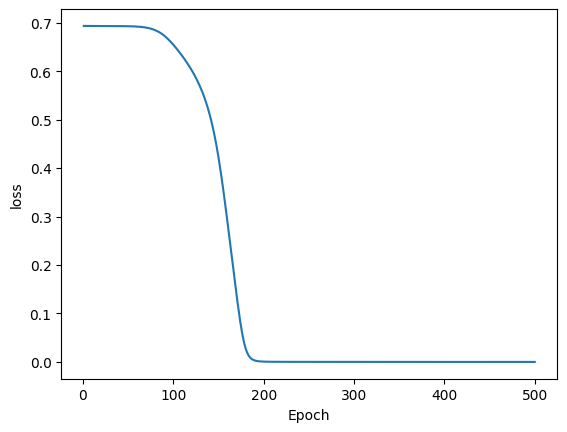

In [60]:
plt.plot(range(1,EPOCH+1), loss_history) # 0-99까지에서 1-100까지로 에폭 범위 수정
plt.xlabel('Epoch')
plt.ylabel('loss')

## STEP 4. 모델 테스트하기

Text(0.5, 0.5, 'x2')

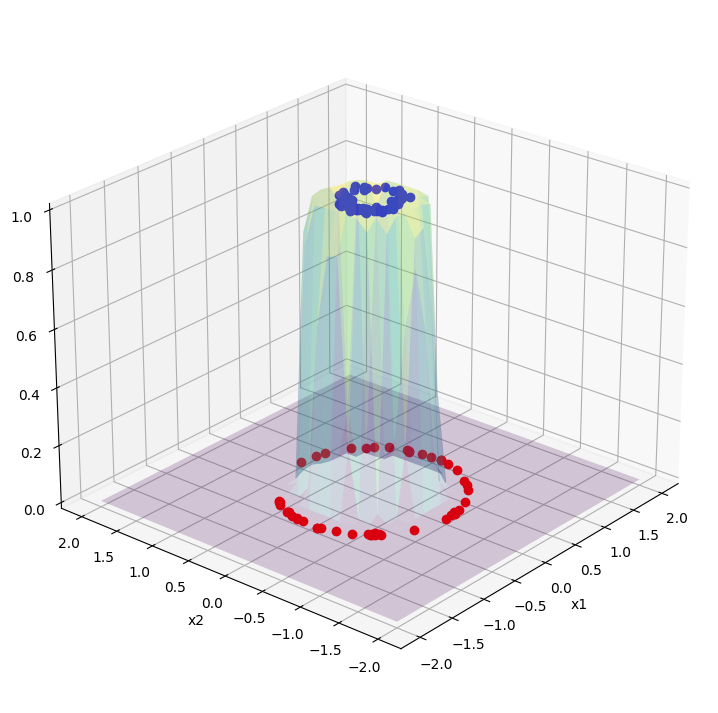

In [50]:
# x1, x2를 격자처럼 많은 값을 만들어서 모델을 통과시켜서 봐보자.
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1
x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test = torch.meshgrid(x1_test,x2_test)
# 두개 합쳐주기
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)
# nn.Linear에 넣기 위해서는 채 또는 개체가 되어야 하는데, 개가 앞에 하나 더 늘어나도 됨 : 개개체로 만들었음.
# X_test.shape

model.eval() # test mode로 바꿔준다.
with torch.no_grad():
    y_hat = model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다

Y_hat = y_hat.squeeze()
# print(model.training)
# model.train()
# print(model.training)
# if self.training:
#     드랍 시켜
# else:
#     전원 출근
# 이런게 가능해서 만약 train 모드로 했다면 큰일 난다..

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [51]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)